<a href="https://colab.research.google.com/github/nuhan2007/PyTorch_Practice/blob/simple_nn/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

torch.manual_seed(41)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

my_df['species'] = my_df['species'].replace("setosa", 0.0)
my_df['species'] = my_df['species'].replace("versicolor", 1.0)
my_df['species'] = my_df['species'].replace("virginica", 2.0)

my_df

<ipython-input-2-7d13a45805a3>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace("virginica", 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from sklearn.model_selection import train_test_split
X = my_df.drop('species', axis = 1)
y = my_df['species']
X = X.values
y = y.values

#80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [ ]:
import torch.optim as optim
# Set criterion for model to measure error (how far off)
criterion = nn.CrossEntropyLoss()
# Choose optimizer (Adam), model.parameters defines layers for iterations
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# Train the model
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get prediction
  y_pred = model(X_train)

  # measure the loss/error
  loss = criterion(y_pred, y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.9593889713287354
Epoch: 10 and loss: 0.9310257434844971
Epoch: 20 and loss: 0.898703932762146
Epoch: 30 and loss: 0.8625795841217041
Epoch: 40 and loss: 0.8231237530708313
Epoch: 50 and loss: 0.7819623351097107
Epoch: 60 and loss: 0.7424018383026123
Epoch: 70 and loss: 0.7054346203804016
Epoch: 80 and loss: 0.6709553599357605
Epoch: 90 and loss: 0.6387065052986145


Text(0.5, 0, 'Epoch')

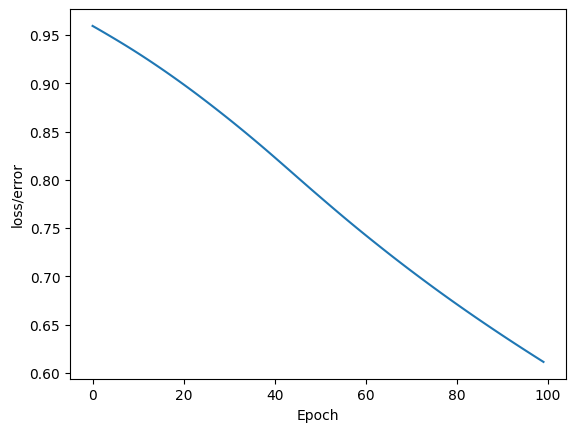

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")